In [27]:
import numpy as np
from pprint import pprint
import sys
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

try:
    from Hermite_functions import *
except:
    sys.path.append('..')
    from Hermite_functions import *

import time
get_time = time.perf_counter

In [60]:
x_ZP = 0.33
x = np.linspace(-1, 1, 1001) * 20 * x_ZP
n_max = 5

psi_n = Hermite_functions(n_max, x / np.sqrt(2) / x_ZP)
psi_QHO = {k: v / (2 * x_ZP**2)**(1/4) for k, v in psi_n.items()}

In [61]:
params = {
'text.usetex' : True, # use latex text
'text.latex.preamble' : r'\usepackage{braket}\usepackage{amssymb}\usepackage{txfonts}', # latex packages
'font.family' : r'Times New Roman',
'figure.dpi' : 200,
'figure.autolayout' : True, # tight layout (True) or not (False)
'axes.labelpad' : 1,
'axes.xmargin' : 0,
'axes.ymargin' : 0,
# 'axes.autolimit_mode' : round_numbers, # set axis limits by rounding min/max values
'axes.autolimit_mode' : 'data', # set axis limits as min/max values
'xtick.major.pad' : 2,
'ytick.major.pad' : 2,
'lines.linewidth' : 1.3,
'xtick.direction' : 'in',
'ytick.direction' : 'in',
'xtick.top' : True,
'ytick.right' : True,
'xtick.minor.visible' : True,
'ytick.minor.visible' : True,
'legend.framealpha': None
}

mpl.rcParams.update(params)

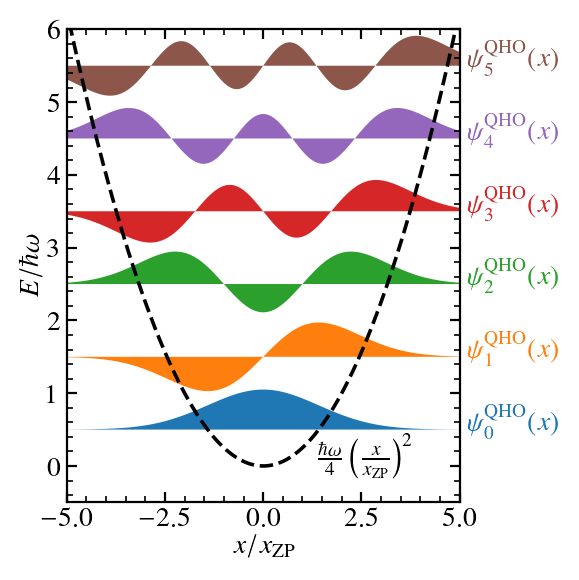

In [97]:
fig, ax = plt.subplots(figsize=(3,3))

for n in range(0, n_max+1):
    y = 0.5*psi_QHO[n] + n + 0.5
    area, = ax.fill(x/x_ZP, y)
    ax.text(5.2, n + 0.5, r'$\psi_{' + str(n) + '}^{\mathrm{QHO}}(x)$', color=plt.getp(area, 'fc'))
    
ax.text(1.4, 0, r'$\frac{\hbar\omega}{4} \left(\frac{x}{x_{\mathrm{ZP}}}\right)^2$')
ax.plot(x/x_ZP, 0.25*(x/x_ZP)**2, color='k', ls='--')

ax.set_ylim([-0.5, 6])
ax.set_xlim([-5, 5])
ax.set_xlabel(r'$x/x_{\mathrm{ZP}}$')
ax.set_ylabel(r'$E/\hbar \omega$')

plt.savefig('QHO_states.png')
plt.show()